**Problem Statement: Detect Credit Card Fraud from transaction data.**
* Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
* This is a good example of the shared dataset, which is created from an original dataset that has privacy issues so this dataset has masked, transformed, PCA features or information. 
* As all features are already transformed, any domain-specific thing can not be analyzed through this dataset.
* It is a highly imbalanced dataset for classification problems that require special class imbalance learning strategies. 

# Imports

In [ ]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f07984910>,
      dtype=object)

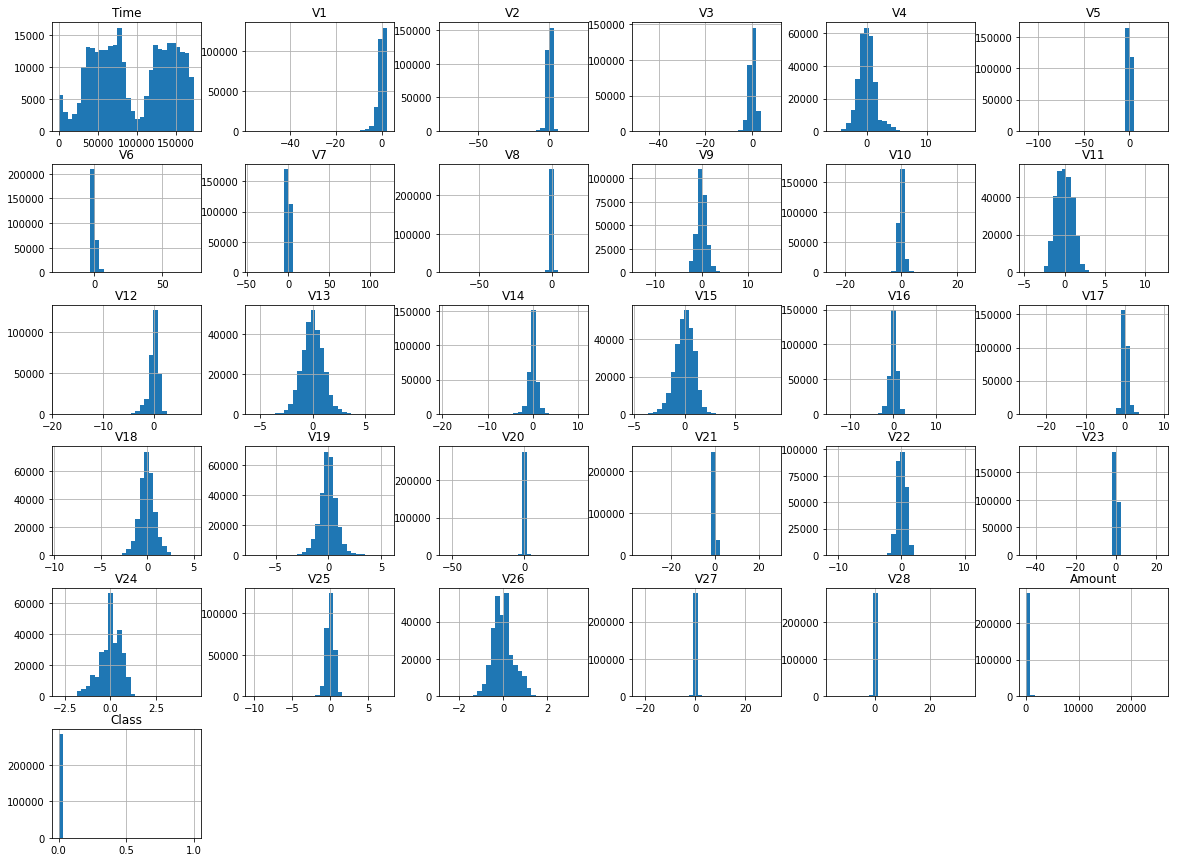

In [ ]:
df.hist(figsize=(20,15), bins=30)

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Class imbalance treatment will require because it is highly imbalanced.

# Class Balancing (Random Under-Sampleing)

In [ ]:
# Random under-sampleing
# Random sampling in normal transactions
df2 = df.loc[df['Class']==0].sample(n=492).copy()
# All samples of fraud transactions
df3 = df.loc[df['Class']==1].copy()

# Concat all transactions, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,145687.0,1.893336,-0.099423,-1.912035,0.079914,1.201360,1.137802,-0.171470,0.383766,0.261876,-0.352639,1.559231,0.941820,-0.165910,-0.544593,0.358939,-0.340541,1.024846,-1.151455,-0.709321,-0.225992,-0.238286,-0.532660,0.378920,-0.826615,-0.492915,0.268201,-0.016308,-0.053204,11.99,0
1,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,4.419997,-10.592305,-0.703796,-3.926207,-2.400246,-6.809890,-12.462315,-5.501051,-0.567940,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
2,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,8.460244,-17.003289,0.101557,-14.094452,0.747031,-12.661696,-18.912494,-6.626975,4.008921,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1
3,66069.0,1.389132,-1.145339,0.777612,-1.444203,-1.630253,-0.248654,-1.287493,0.130540,-1.924039,1.553757,1.568489,-0.331185,-0.227671,-0.018909,0.360087,-0.313822,0.562302,-0.026443,-0.382598,-0.377421,-0.279466,-0.500653,0.223721,0.161893,-0.021786,-0.409347,0.050689,0.018159,19.60,0
4,7584.0,1.068680,0.016890,0.352772,1.451562,-0.035823,0.356734,-0.188405,0.152041,1.573906,-0.298236,1.546209,-2.238390,-0.096283,2.001916,-1.328848,-0.380473,0.717515,0.100500,-0.159824,-0.230889,-0.215908,-0.341843,-0.119898,-0.389781,0.585336,-0.347505,-0.009116,-0.000236,48.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,124246.0,-0.269502,-3.731049,-3.285776,1.293807,-0.776322,-0.452505,1.661203,-0.439188,0.388482,-0.876201,0.822502,0.044371,-0.923561,-0.165288,0.564221,0.725237,0.205539,1.492202,-0.421505,2.177511,0.926447,0.050487,-1.127032,-0.594266,-0.203702,-0.209297,-0.235423,0.161067,1197.90,0
980,132294.0,-0.306708,0.778032,-2.902623,-0.537412,0.677462,-0.580986,2.246490,-0.139519,-0.412423,-0.237418,-2.105318,-1.059817,-1.480207,1.265055,-0.648030,-0.404461,-0.335013,-0.089747,-0.066600,-0.312261,0.434472,1.408888,0.309205,0.081234,-1.020236,0.406786,0.352425,0.235469,234.28,0
981,162509.0,1.928146,-0.188099,-0.787256,0.252817,-0.308491,-1.164406,0.159744,-0.361076,0.328755,0.016680,-0.270880,1.063310,1.464229,0.082444,0.708506,0.371151,-0.642841,-0.966225,-0.013131,0.013197,-0.404908,-1.255663,0.483466,0.034918,-0.701011,0.006875,-0.070663,-0.034176,66.62,0
982,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,3.676703,-7.642983,1.689865,-8.299660,0.646996,-6.792795,-12.075932,-4.882180,2.626625,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1


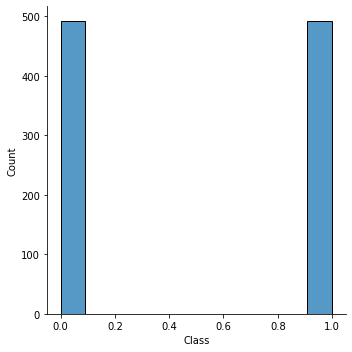

In [ ]:
sns.displot(df4['Class'])

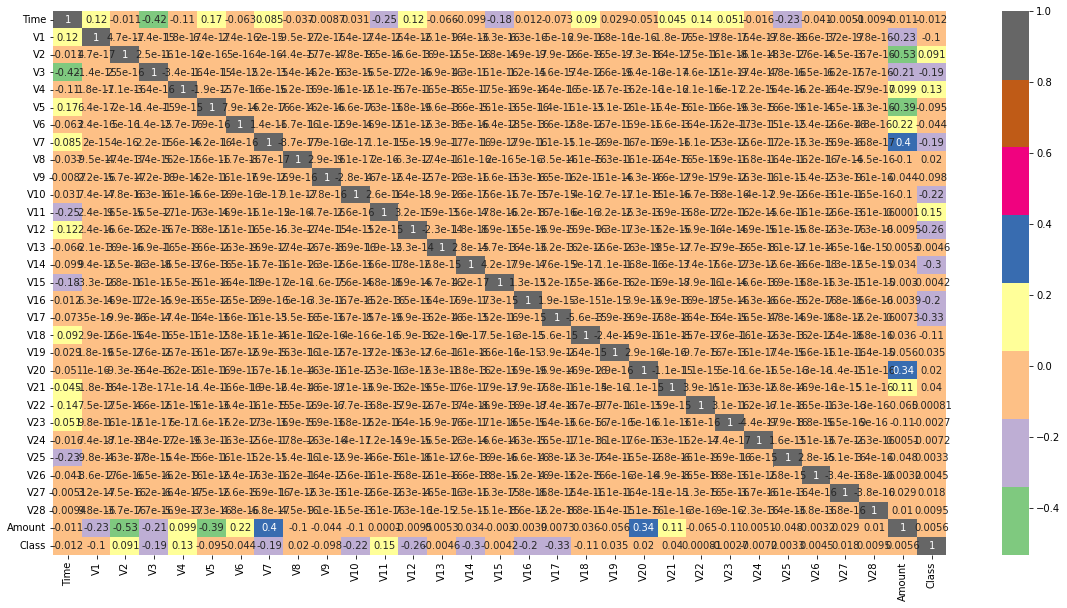

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='Accent')

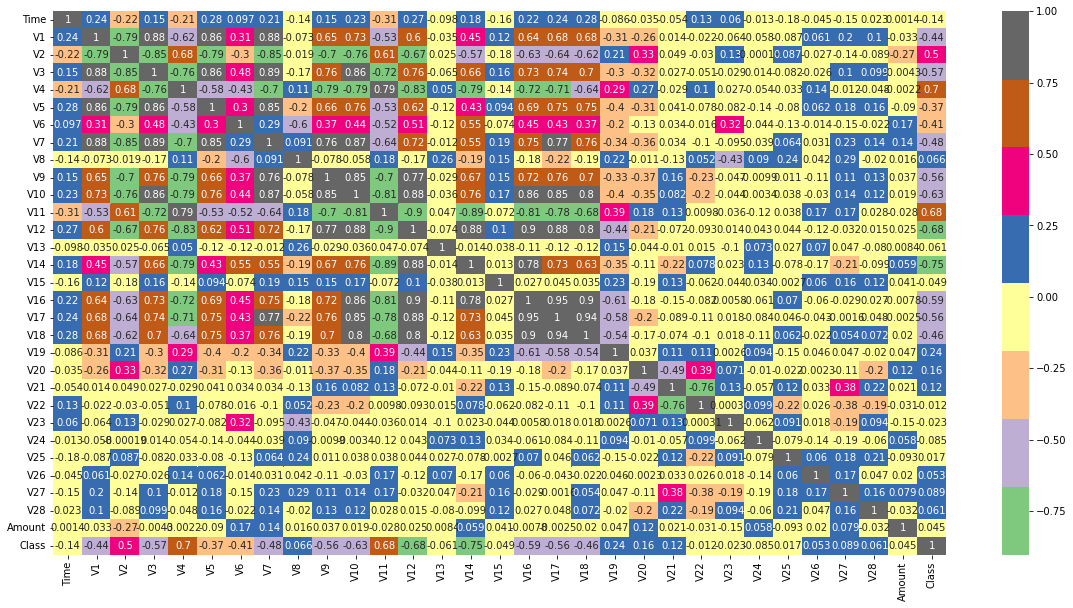

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(), annot=True, cmap='Accent')

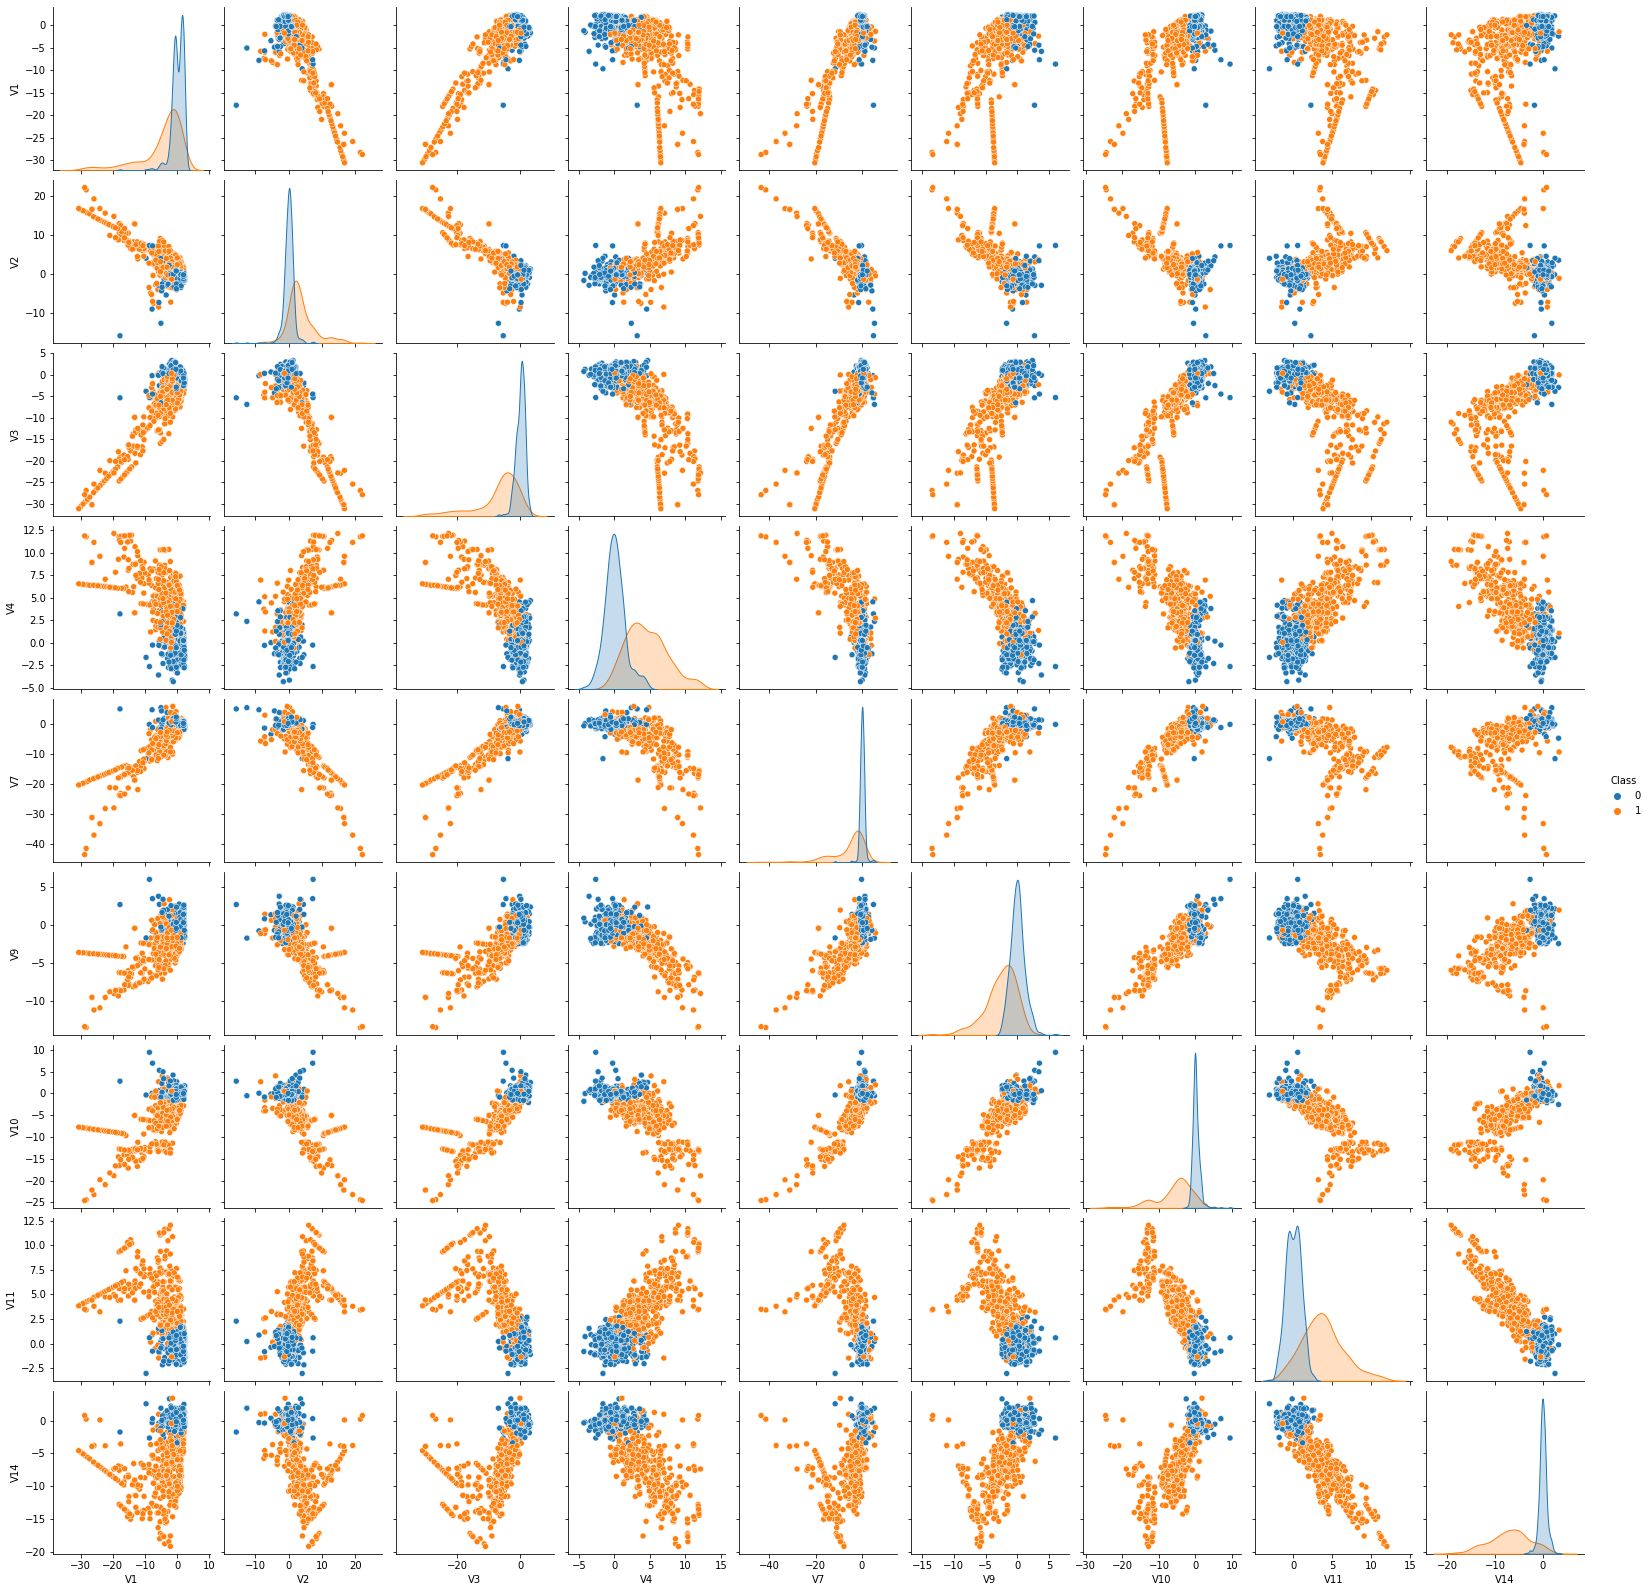

In [ ]:
# All high corelation features to class are 'V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14'
# pair plot will give good intuation about geomentry of data points on all features
sns.pairplot(df4[['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14', 'Class']], hue='Class')

**Random Under-Sampling**
* Pair plot shows clearly two compartments in almost all plots so random under-sampling is going right.
* All the features are masked for privacy issues, so the pair plot is enough to give the most information.

# Feature Selection

In [ ]:
df4.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
X = df4[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

sel = VarianceThreshold(threshold=(.8))
sel.fit_transform(X)

array([[ 1.45687000e+05,  1.89333554e+00, -9.94231723e-02, ...,
         3.78920453e-01, -1.63080760e-02,  1.19900000e+01],
       [ 9.43620000e+04, -2.64577447e+01,  1.64974719e+01, ...,
         8.96537504e-01, -7.26348215e+00,  1.00000000e+00],
       [ 9.38530000e+04, -5.83919162e+00,  7.15153235e+00, ...,
         5.30480596e-01,  1.04886020e-01,  3.16060000e+02],
       ...,
       [ 1.62509000e+05,  1.92814627e+00, -1.88098905e-01, ...,
         4.83465863e-01, -7.06625337e-02,  6.66200000e+01],
       [ 3.61700000e+04, -5.68501342e+00,  5.77651621e+00, ...,
        -1.10045084e-01,  3.03444582e-01,  1.11700000e+02],
       [ 4.18510000e+04, -1.91397329e+01,  9.28684736e+00, ...,
        -7.60556415e-01, -3.38184293e+00,  1.39900000e+02]])

In [ ]:
X = sel.fit_transform(X)
X[0]

array([ 1.45687000e+05,  1.89333554e+00, -9.94231723e-02, -1.91203548e+00,
        7.99142497e-02,  1.20136020e+00,  1.13780153e+00, -1.71470358e-01,
        3.83766404e-01,  2.61875800e-01, -3.52638580e-01,  1.55923108e+00,
        9.41820012e-01, -1.65910238e-01, -5.44593403e-01,  3.58938970e-01,
       -3.40541263e-01,  1.02484629e+00, -1.15145510e+00, -7.09321003e-01,
       -2.25992174e-01, -2.38285812e-01, -5.32660041e-01,  3.78920453e-01,
       -1.63080760e-02,  1.19900000e+01])

In [ ]:
y = df4['Class']

# Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Random Forest

In [ ]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.02, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.02, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

---Train Data---
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       319
           1       0.99      0.89      0.94       340

    accuracy                           0.94       659
   macro avg       0.94      0.94      0.94       659
weighted avg       0.94      0.94      0.94       659

---Test Data---
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       173
           1       1.00      0.89      0.94       152

    accuracy                           0.95       325
   macro avg       0.96      0.94      0.95       325
weighted avg       0.95      0.95      0.95       325



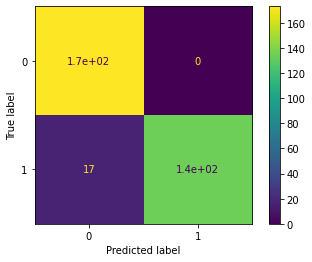

In [ ]:
print('---Train Data---')
print(classification_report(y_train, y_pred=(rfc.predict(X_train))))
print("---Test Data---")
print(classification_report(y_test, y_pred=(rfc.predict(X_test))))
plot_confusion_matrix(rfc, X_test, y_test)

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

---Train Data---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       319
           1       0.97      0.93      0.95       340

    accuracy                           0.95       659
   macro avg       0.95      0.95      0.95       659
weighted avg       0.95      0.95      0.95       659

---Test Data---
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       173
           1       0.94      0.92      0.93       152

    accuracy                           0.94       325
   macro avg       0.94      0.93      0.94       325
weighted avg       0.94      0.94      0.94       325



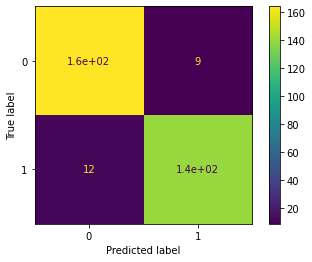

In [ ]:
print('---Train Data---')
print(classification_report(y_train, y_pred=(lr.predict(X_train))))
print("---Test Data---")
print(classification_report(y_test, y_pred=(lr.predict(X_test))))
plot_confusion_matrix(lr, X_test, y_test)

# AUC-ROC

In [ ]:
p1 = rfc.predict_proba(X_test)
p2 = lr.predict_proba(X_test)

In [ ]:
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
print(auc_score1,auc_score2)

0.9656031335564343 0.9737222391238212


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

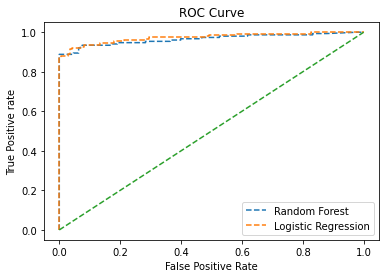

In [ ]:
plt.plot(fpr1, tpr1, linestyle='--', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

---